# Imports

In [1]:
import warnings

import numpy   as np
import pandas  as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn               import metrics
from sklearn.cluster       import KMeans, MeanShift, estimate_bandwidth, DBSCAN
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

/tmp/ipykernel_6418/966337370.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Functions

In [2]:
random_state = 42
np.random.seed(random_state)

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = 500

# Loading Datasets

In [16]:
df = pd.read_csv('../data/raw/CC GENERAL.csv')

In [17]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Dimensions

In [18]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))

Number of Rows: 8950
Number of Cols: 18


## Check NA

In [19]:
df.isna().mean() * 100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [23]:
medians = df.median()
df = df.fillna(medians)

## Columns

In [22]:
df = df.drop(['CUST_ID', 'TENURE'], axis=1)

In [24]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


# Feature Engineering

## Rescaling

In [25]:
X = df.copy()

In [26]:
norm = Normalizer()
X_norm = norm.fit_transform(X)

In [27]:
X.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
dtype: object

# Machine Learning

## KMeans

In [28]:
kmeans = KMeans(n_clusters=5, max_iter=10)
y = kmeans.fit_predict(X_norm)

**Métricas**

- Externas
    - Precisamos dos *labels*
- Internas
    - Independentes dos *labels*
        - Compactação: Quanto mais próximos estão os pontos entre si.
        - Separação: Quão bem separados estão os *clusters* entre si.
        - Coeficiente de Silhouette
            - Varia entre -1 e 1. Quando mais perto de 1, melhor os *clusters* estão separados e compactados.
        - Índice de Davies-Bouldin
            - A pontuação mínima é zero, com valores mais baixos indicando melhor agrupamento.
            - Um valor baixo do índice indica que há uma melhor separação entre os clusters e melhor copactação
            - Este índice é parecido comm o Silhouette, porém leva em consideração os centróides.
        - Índice Calinski-Harabasz
            - Leva e consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes.
            - A pontuação é maior quando os clusters são densos e bem separados, o que se relaciona com um conceito padrão de cluster.



In [29]:
metrics.silhouette_score(X_norm, y)

0.35596291921717227

In [30]:
metrics.silhouette_samples(X_norm, y)

array([0.61969082, 0.40028185, 0.23976532, ..., 0.64429711, 0.58765287,
       0.17569715])

In [31]:
metrics.davies_bouldin_score(X_norm, y)

1.1100148423372147

In [32]:
metrics.calinski_harabasz_score(X_norm, y)

3414.088551460871

In [37]:
def clustering_algorithm(n_clusters, dataset):

    kmean = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)

    s = metrics.silhouette_score(dataset, labels)

    dbs = metrics.davies_bouldin_score(dataset, labels)

    calinski = metrics.calinski_harabasz_score(dataset, labels)

    return s, dbs, calinski

In [39]:
sl, dbs1, calinski = clustering_algorithm(3, X_norm)
sl, dbs1, calinski

(0.3641642054290013, 1.0775738546313511, 3431.44429137008)

In [40]:
sl, dbs1, calinski = clustering_algorithm(5, X_norm)
sl, dbs1, calinski

(0.34854069996702836, 1.1530108069626142, 3422.8043305461106)

In [41]:
sl, dbs1, calinski = clustering_algorithm(10, X_norm)
sl, dbs1, calinski

(0.3486343630652038, 1.152085420330187, 3422.825795656532)

In [42]:
sl, dbs1, calinski = clustering_algorithm(20, X_norm)
sl, dbs1, calinski

(0.34853294534549095, 1.1525969214970389, 3422.8373415940955)

**Uma outra forma de validação é através da comparação com uma base de dados aletarória**

In [43]:
random_data = np.random.rand(8950, 16)
clustering_algorithm(5, random_data)

(0.036099868026282386, 3.5965486802409172, 285.7077690430397)

**Testar a estabilidade dos clusters**

- A ideia é que dividamos a base de dados e executemos o kmeans para cada uma dessas divisões a fim de obtermos resultados similares para as métricas.
- Queremos que o kmeans se comporte similarmente em cada uma para conseguirmos a validação.

In [44]:
set1, set2, set3 = np.array_split(X_norm, 3)

s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36910379358377715 1.0574271222562335 1204.0444265560616
0.3518306937675673 1.150864446260993 1191.5849927999548
0.36719816355485774 1.0982776424078395 1167.5124673818946


**Visializando os clusters por meio de atributos**

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

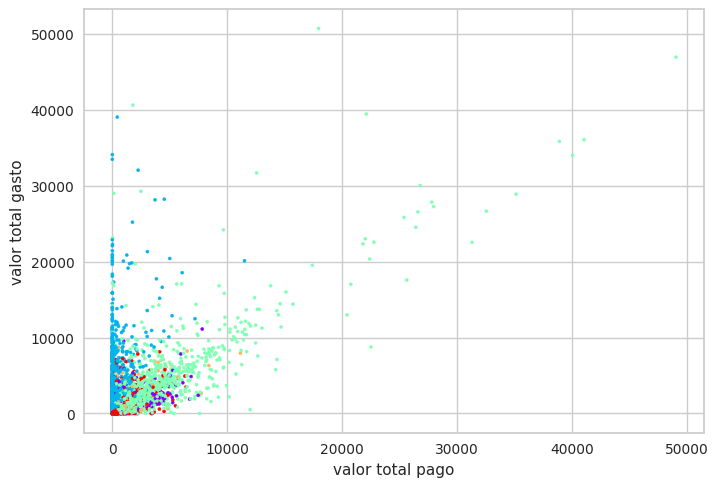

In [45]:
import matplotlib.pyplot as plt

plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=y, s=5, cmap='rainbow' )
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show()

In [ ]:
X["cluster"] = y
sns.pairplot(X[0:], hue="cluster")

In [50]:
X.groupby('cluster').describe()

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0        2093.0  3284.391050  2575.757409  114.523682  1380.307150   
1        1612.0  1988.462492  1957.461500    0.000000   664.545638   
2        1633.0  1115.711865  1636.910733    0.000000   205.421413   
3         350.0  1967.442186  1839.231440   70.794108  1010.501276   
4        3262.0   432.818964   807.054292    0.000000    23.280152   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2444.389258  4550.717687  18495.558550            2093.0  0.997707   
1        1318.825458  2655.041636  14581.459140            1612.0  0.869495   
2         542.051302  1329.967543  19043.138560            1633.0  0.909585   
3        1304.253614  2143.941798  11209.370760             350.0  0.988730   
4          82.595365   408.337735   7533.854422            3262.0  0.775701   

                                                     PURCHASES               \
              std       min       25%  50%  75%  max     count         mean   
cluster                                                                       
0        0.019099  0.454545  1.000000  1.0  1.0  1.0    2093.0   483.595781   
1        0.215580  0.000000  0.818182  1.0  1.0  1.0    1612.0   308.062283   
2        0.193138  0.000000  0.909091  1.0  1.0  1.0    1633.0  3120.587979   
3        0.047671  0.636364  1.000000  1.0  1.0  1.0     350.0   861.145171   
4        0.300660  0.000000  0.545455  1.0  1.0  1.0    3262.0   635.377042   

                                                                    \
                 std  min        25%      50%        75%       max   
cluster                                                              
0         900.570297  0.0     0.0000   120.00   549.9600   7823.74   
1         719.458912  0.0     0.0000     0.00   331.9625  11500.94   
2        4044.905172  0.0  1027.0100  1954.08  3702.7900  49039.57   
3        1285.088804  0.0   118.3725   484.48  1042.9150  11147.33   
4         769.683830  0.0   133.0000   365.98   839.1275   6407.67   

        ONEOFF_PURCHASES                                                  \
                   count         mean          std  min    25%       50%   
cluster                                                                    
0                 2093.0   291.229680   641.530095  0.0    0.0     0.000   
1                 1612.0   179.166973   493.470547  0.0    0.0     0.000   
2                 1633.0  2029.706810  3332.954104  0.0  294.7  1129.820   
3                  350.0   159.752543   412.934049  0.0    0.0     0.000   
4                 3262.0   316.839050   570.854297  0.0    0.0    27.985   

                             INSTALLMENTS_PURCHASES                            \
               75%       max                  count         mean          std   
cluster                                                                         
0         270.0700   7564.81                 2093.0   192.501644   446.622837   
1         120.8100   6678.26                 1612.0   128.916849   383.615003   
2        2468.9600  40761.25                 1633.0  1091.445775  1658.957971   
3         102.2500   3352.28                  350.0   702.246314  1176.426908   
4         415.3525   6300.40                 3262.0   318.889749   445.846110   

                                                  CASH_ADVANCE               \
         min    25%      50%        75%       max        count         mean   
cluster                                                                       
0        0.0    0.0    0.000   182.5000   4872.60       2093.0  1033.819350   
1        0.0    0.0    0.000    51.6825   8409